# Cálculo del PERT de un proyecto

## Datos de partida del PERT

In [1]:
import pandas as pd

In [2]:
datos_pert = pd.DataFrame({ 'A':  (1, 4,  2),
                            'B':  (1, 3,  4),
                            'C':  (3, 6,  1),
                            'D':  (4, 5,  3),
                            'E':  (5, 7,  7),
                            'F':  (6, 7,  4),
                            'G':  (1, 2,  1),
                            'H':  (2, 7, 11),
                            'I':  (7, 9,  2),
                            'J':  (7, 8,  8),
                            'f1': (3, 5,  0),
                            'f2': (8, 9,  0),
                          },
                          index=['nodo_inicial','nodo_final','duracion']).T
datos_pert

,nodo_inicial,nodo_final,duracion
A,1,4,2
B,1,3,4
C,3,6,1
D,4,5,3
E,5,7,7
F,6,7,4
G,1,2,1
H,2,7,11
I,7,9,2
J,7,8,8


## Cálculo usando Python
### Importamos librerías de Python.
En pmule (project management at ULE) está el código que utilizamos para calcular los valores del PERT.

In [3]:
from IPython.display import Image
from pmule import PertGraph


### La clase PertGraph permite calcular y visualizar el PERT

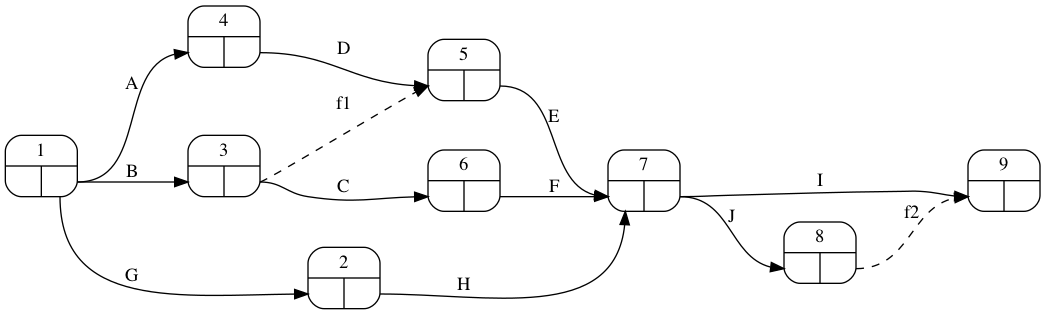

In [16]:
pert = PertGraph(datos_pert)

filename='pert_en_blanco.png'
pert.write_dot(filename=filename, orientation='portrait', tiempos=False, ranksep=1, nodesep=0.5)
Image(filename)

### Matriz de Zaderenko 

In [17]:
pert.zaderenko()

,1,4,3,6,5,7,2,9,8,temprano
1,,2,4,,,,1,,,0
4,,,,,3,,,,,2
3,,,,1,0,,,,,4
6,,,,,,4,,,,5
5,,,,,,7,,,,5
7,,,,,,,,2,8,12
2,,,,,,11,,,,1
9,,,,,,,,,,20
8,,,,,,,,0,,20
tardio,0,2,5,8,5,12,1,20,20,


In [18]:
pert.tiempos()

,1,4,3,6,5,7,2,9,8
tardio,0,2,5,8,5,12,1,20,20
temprano,0,2,4,5,5,12,1,20,20


In [19]:
pert.duracion()

20

In [20]:
pert.holguras()

,H_total
nombre,
A,0
B,1
G,0
D,0
C,3
f1,1
F,3
E,0
I,6


In [21]:
pert.camino_critico()

{'Actividades': ['A', 'G', 'D', 'E', 'J', 'H', 'f2'], 'Nodos': [1, 4, 5, 7, 8]}

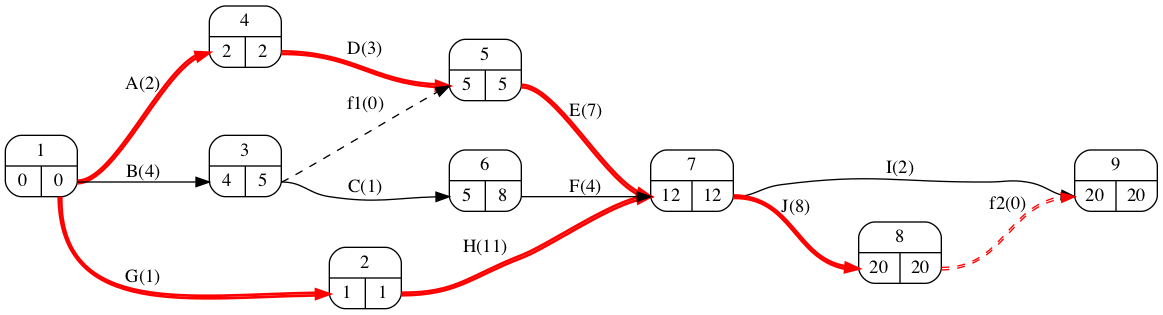

In [23]:
filename='pert_resuelto.png'
pert.write_dot(filename=filename, orientation='portrait', tiempos=True, ranksep=1, nodesep=0.5)
Image(filename)